In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys, scipy
from   scipy.spatial import distance
from   scipy.stats import gaussian_kde
from   itertools import combinations

In [2]:
def calculate_js_distance(data1, data2, num_points=1000):
    '''Calculate the Jensen-Shannon DISTANCE between two datasets.
    Takes two Pandas series, calculates KDE of each, normalizes, and
      calculates JSD via SciPy over num_points grid. Returns JSD.
    Note that JS distance = sqrt(JS divergence)
    '''
    # Create kernel density estimates
    kde1 = gaussian_kde(data1)
    kde2 = gaussian_kde(data2)
    
    # Create a common evaluation grid
    x_min = min(data1.min(), data2.min())
    x_max = max(data1.max(), data2.max())
    x_grid = np.linspace(x_min, x_max, num_points)
    
    # Calculate probability densities on the grid
    p = kde1(x_grid)
    q = kde2(x_grid)
    
    # Normalize to ensure they're proper probability distributions
    p = p / np.sum(p)
    q = q / np.sum(q)

    # Calculate Jensen-Shannon divergence
    js_divergence = distance.jensenshannon(p, q)
    
    return js_divergence

Jensen-Shannon Divergence: 0.198907971655834


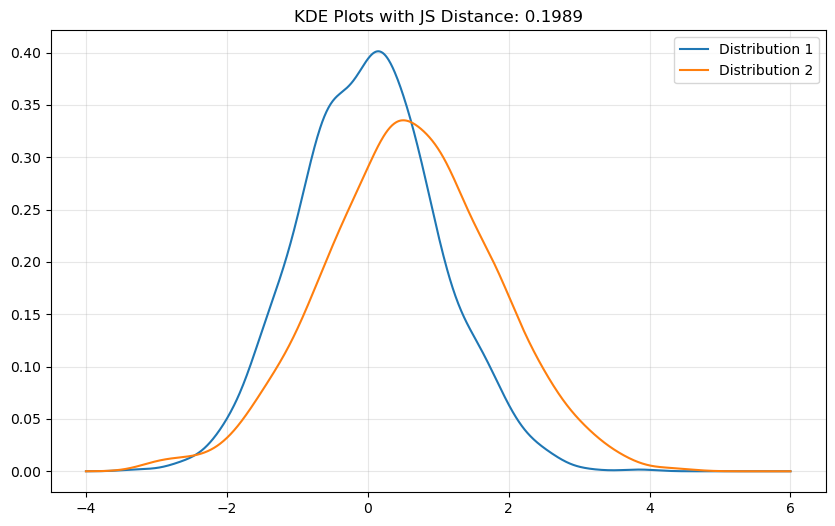

In [3]:
# Example usage
np.random.seed(42)
data1 = np.random.normal(0, 1, 1000)  # Normal distribution with mean 0, std 1
data2 = np.random.normal(0.5, 1.2, 1000)  # Slightly different normal distribution

js_dist = calculate_js_distance(data1, data2)
print(f"Jensen-Shannon Divergence: {js_dist}")

# Visualize the two distributions
plt.figure(figsize=(10, 6))
x = np.linspace(-4, 6, 1000)
kde1 = gaussian_kde(data1)
kde2 = gaussian_kde(data2)

plt.plot(x, kde1(x), label='Distribution 1')
plt.plot(x, kde2(x), label='Distribution 2')
plt.title(f'KDE Plots with JS Distance: {js_dist:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

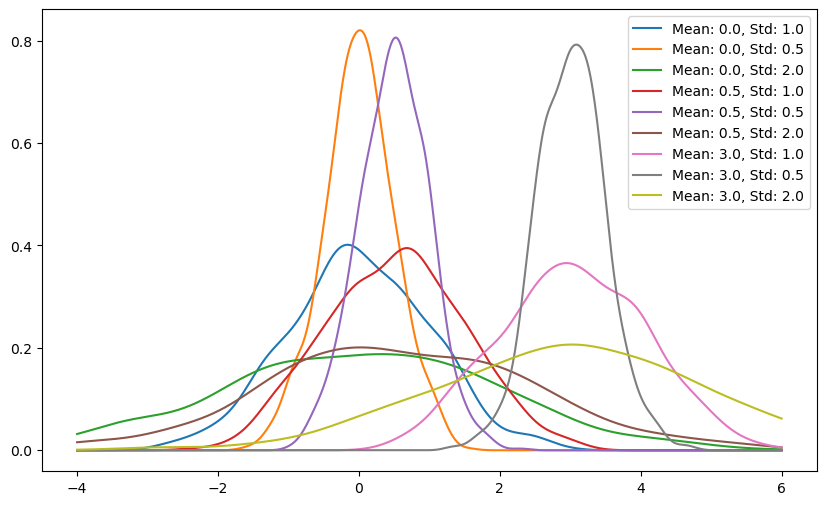

JS distances, smallest to largest


,Data 1,Data 2,JS dist
17,"Mean: 0.0, Std: 2.0","Mean: 0.5, Std: 2.0",0.115828
2,"Mean: 0.0, Std: 1.0","Mean: 0.5, Std: 1.0",0.178118
34,"Mean: 3.0, Std: 1.0","Mean: 3.0, Std: 2.0",0.283439
22,"Mean: 0.5, Std: 1.0","Mean: 0.5, Std: 2.0",0.296096
4,"Mean: 0.0, Std: 1.0","Mean: 0.5, Std: 2.0",0.304221
0,"Mean: 0.0, Std: 1.0","Mean: 0.0, Std: 0.5",0.305183
1,"Mean: 0.0, Std: 1.0","Mean: 0.0, Std: 2.0",0.307497
21,"Mean: 0.5, Std: 1.0","Mean: 0.5, Std: 0.5",0.311998
10,"Mean: 0.0, Std: 0.5","Mean: 0.5, Std: 0.5",0.325713
15,"Mean: 0.0, Std: 2.0","Mean: 0.5, Std: 1.0",0.328638


In [19]:
means =  [0.0, 0.5, 3.0]
stdevs = [1.0, 0.5, 2.0]

distributions = {}
for m in means:
    for s in stdevs:
        distributions[f"Mean: {m}, Std: {s}"] = np.random.normal(m, s, 1000)

d1 = []
d2 = []
jsd = []
for i, j in combinations(distributions.keys(), r=2):
    d1.append(i)
    d2.append(j)
    jsd.append(calculate_js_distance(distributions[i], distributions[j]))

jsds = pd.DataFrame(
    {
        'Data 1':d1,
        'Data 2':d2,
        'JS dist':jsd
    }
)

plt.figure(figsize=(10, 6))
xs = np.linspace(-4, 6, 1000)
for key in distributions:
    kde = gaussian_kde(distributions[key])
    plt.plot(xs, kde(x), label=key)
plt.legend()
plt.show()

print('JS distances, smallest to largest')
jsds.sort_values(by='JS dist')